In [1]:
import pandas as pd
import numpy as np

**Temperature (K):** The measure of the thermal energy at the surface of the star.

**Luminosity (L/Lo):** The total energy output of the star per second (power), compared to the Sun.

**Radius (R/Ro):** The distance from the center of the star to its surface, relative to the Sun.

**Absolute Magnitude (Mv):** A logarithmic measure of the star’s true brightness, independent of distance.

**Star Type:** The classification based on the star’s nuclear fusion process and life stage.

**Star Category:** A grouping of stars by size, mass, and energy output characteristics.

**Star Color:** The wavelength of light emitted by the star, related to its temperature 

**Spectral Class:** A classification of stars by temperature and absorption lines in the star’s spectrum.

In [2]:
df=pd.read_csv(r"/kaggle/input/star-dataset/6 class csv.csv")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
df['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [5]:
df['Star category']=df['Star type'].apply(lambda x:'Brown Dwarf' if x==0 else 'Red Dwarf' if x==1
                                         else 'White Dwarf' if x==2 else 'Main Sequence' if x==3
                                         else 'Supergiant' if x==4 else 'Hypergiant')

**Data Visualization**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

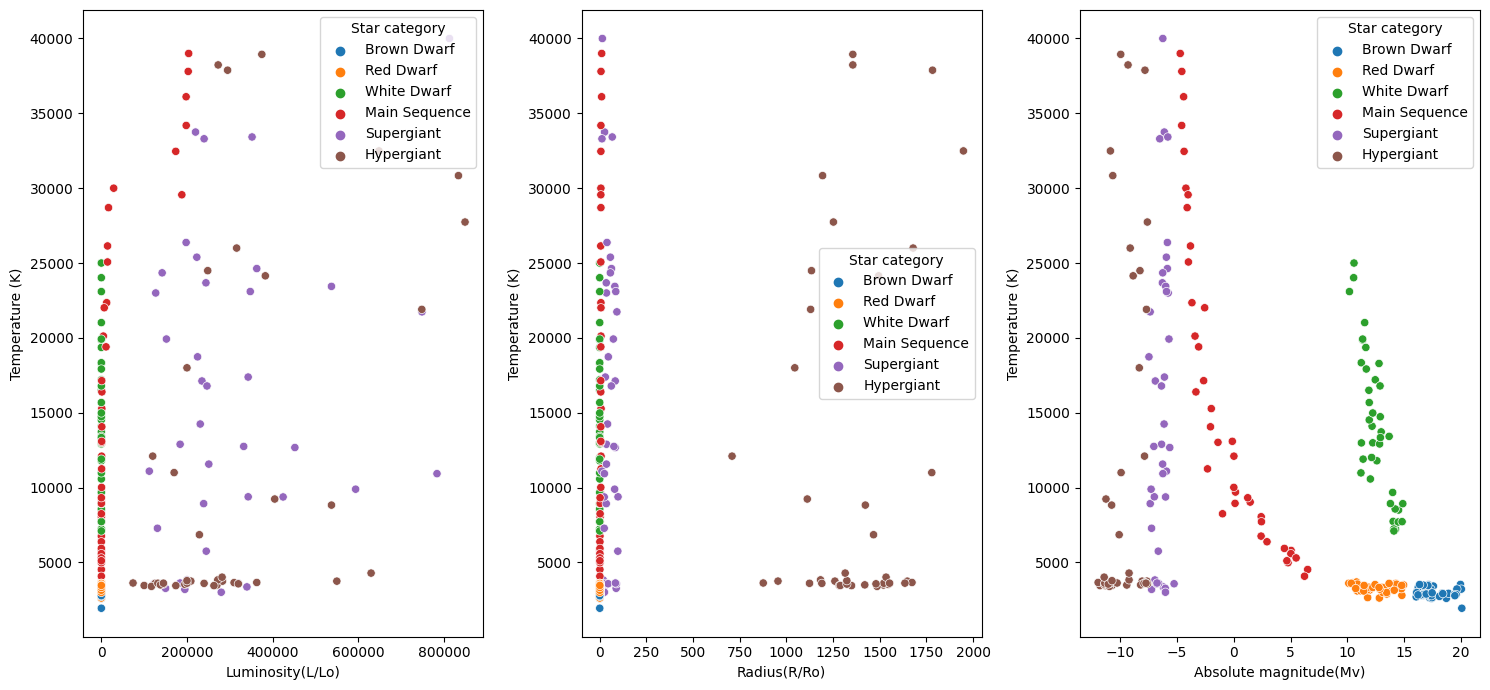

In [7]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
sns.scatterplot(data=df,x='Luminosity(L/Lo)',y='Temperature (K)',hue='Star category',ax=axs[0])
sns.scatterplot(data=df,x='Radius(R/Ro)',y='Temperature (K)',hue='Star category',ax=axs[1])
sns.scatterplot(data=df,x='Absolute magnitude(Mv)',y='Temperature (K)',hue='Star category',ax=axs[2])
plt.tight_layout()
plt.show()

**Temparature vs Luminosity**

1. Brown Dwarfs and Red Dwarfs (blue dots and orange dots) ussually have low Luminosity as well as low Temperature.
2. White Dwarfs (green dots) usually follow a certain pattern where when there is a slight increase in Luminosity the Temperature increases. They have lower Luminosity but higher temperature.
3. Main Sequence stars (red dots) mostly follow a clear pattern, where higher temperatures correspond to higher luminosities.
4. Supergiants (purple) and Hypergiants (brown) are generally more luminous but show a wider spread in temperature.

**Temperature vs Radius**
1. Main Sequence stars again follow a pattern of increasing radius with increasing temperature.
2. Supergiants and Hypergiants have much larger radii but are spread across a wide temperature range.
3. White Dwarfs show small radii despite high temperatures, consistent with their classification.
4. Red and Brown Dwarfs have low temperatures and small radii, clustering towards the bottom left.

**Temperature vs Absolute Magnitude**
1. Main Sequence stars are well-distributed with a strong negative correlation: stars with higher temperatures tend to have lower (brighter) magnitudes.
2. Supergiants and Hypergiants have very bright magnitudes and a wide range of temperatures.
3. White Dwarfs have relatively high absolute magnitudes (dim) despite their high temperatures.
4. Red and Brown Dwarfs cluster at the bottom right, having low temperatures and high (dim) absolute magnitudes.*

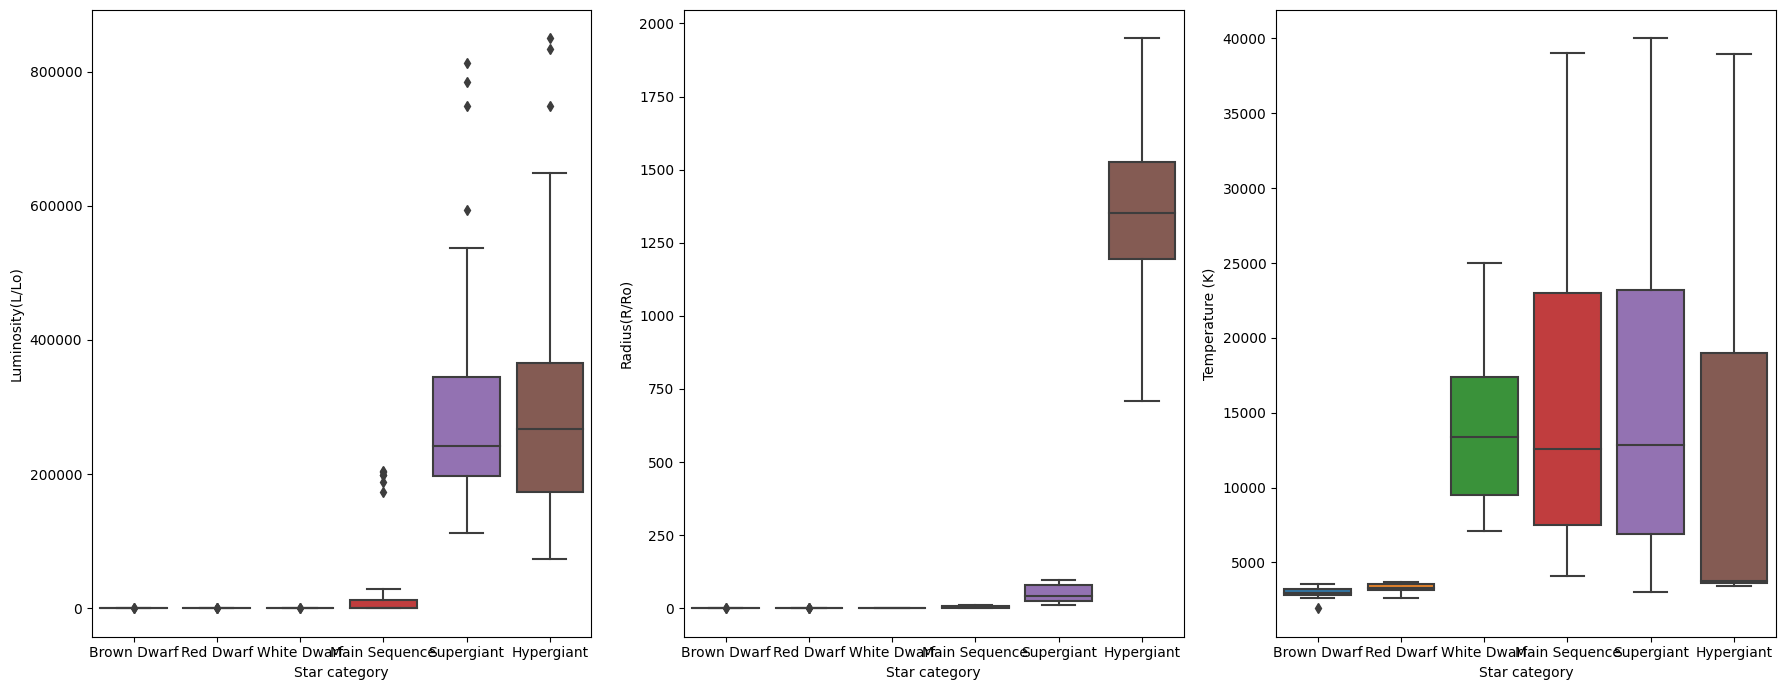

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
sns.boxplot(data=df, x='Star category', y='Luminosity(L/Lo)', ax=axs[0])
sns.boxplot(data=df, x='Star category', y='Radius(R/Ro)', ax=axs[1])
sns.boxplot(data=df, x='Star category', y='Temperature (K)', ax=axs[2])
plt.tight_layout()
plt.show()

**Luminosity (L/Lo) vs Star Category (Left Plot)**

1. Brown Dwarfs, Red Dwarfs, and White Dwarfs: These stars have very low luminosity, with minimal variation. There are outliers visible, but overall they are clustered near zero.
2. Main Sequence stars: Show a moderate increase in luminosity, but still much lower than Supergiants and Hypergiants. The variation is much larger compared to dwarfs.
3. Supergiants and Hypergiants: Have significantly higher luminosity values, with some extreme outliers reaching even greater luminosities. Hypergiants in particular show a very wide range in luminosity.

**Radius (R/Ro) vs Star Category (Middle Plot)**
1. Brown Dwarfs, Red Dwarfs, White Dwarfs: All show very small radii, clustering near the bottom, similar to their small luminosity.
2. Main Sequence stars: Show a slight increase in radius, but remain significantly smaller than Supergiants and Hypergiants.
3. Supergiants and especially Hypergiants: Have enormous radii, with Hypergiants showing much more spread, indicating that Hypergiants can vary widely in size.

**Temperature (K) vs Star Category (Right Plot)**
1. Brown Dwarfs, Red Dwarfs, and White Dwarfs: These stars have low temperatures, with White Dwarfs being the hottest among these categories. The temperature spread is relatively narrow.
2. Main Sequence stars: Show a broader range of temperatures, with some stars reaching very high temperatures compared to dwarfs.
3. Supergiants and Hypergiants: These stars exhibit a wide temperature range, with Supergiants generally showing more variability. Some can be as hot as Main Sequence stars, while others are much cooler.

**The above scatter and box plots provide us with these General Insights**
1. Dwarf stars (Brown, Red, and White) tend to have low luminosity, small radii, and low-to-moderate temperatures.
2. Main Sequence stars are more moderate in all characteristics, but show clear patterns of increasing luminosity, radius, and temperature compared to dwarfs.
3. Supergiants and Hypergiants are the largest and brightest stars, with significant variation in size and temperature. They have a much higher spread 
in luminosity, massive radii, and varying temperatures.

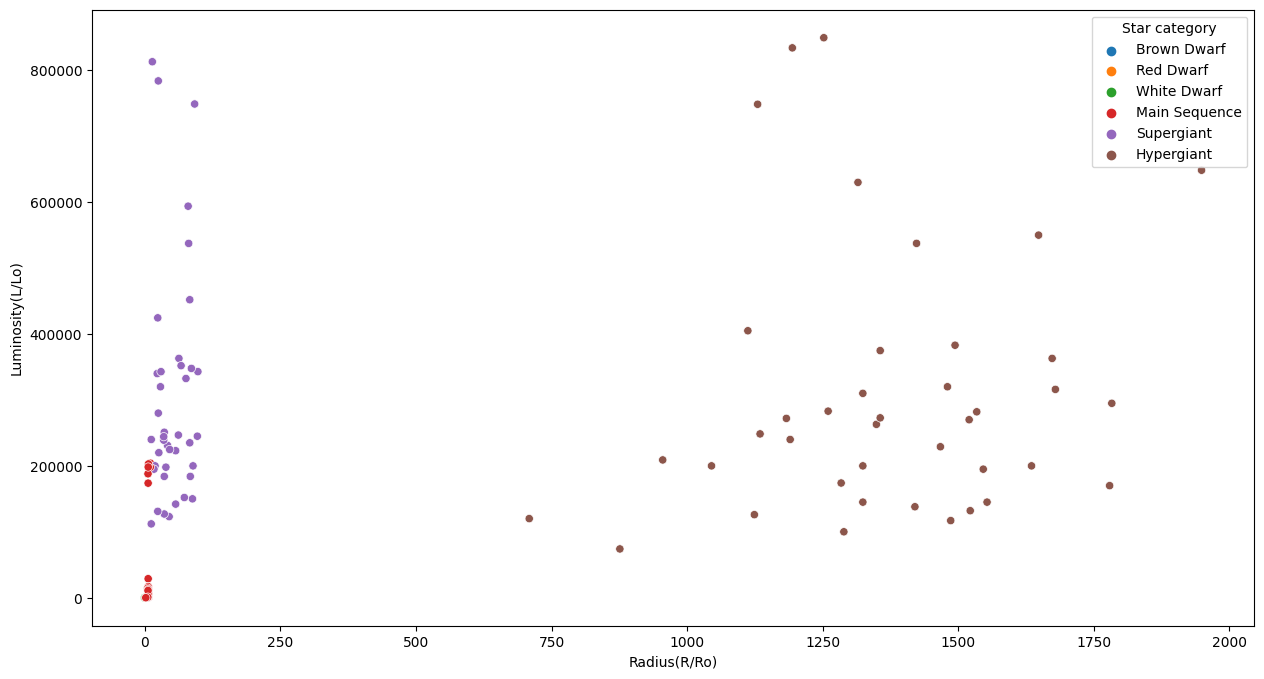

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Radius(R/Ro)', y='Luminosity(L/Lo)', hue='Star category')
plt.show()

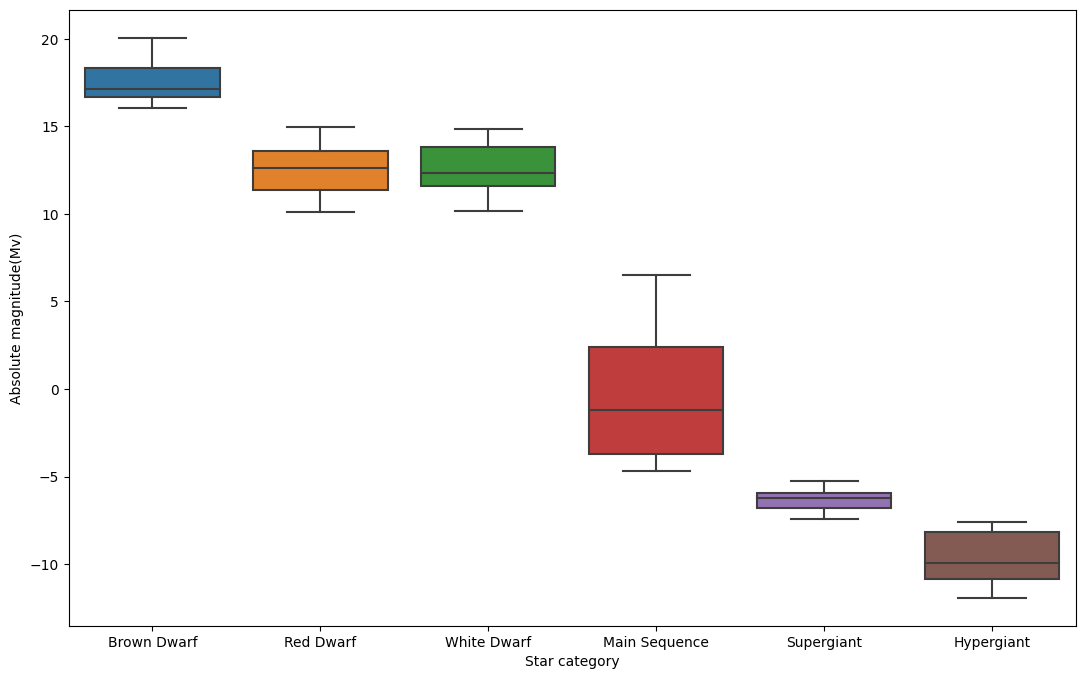

In [10]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df, x='Star category', y='Absolute magnitude(Mv)')
plt.show()

**Brown Dwarfs:** These stars have the highest absolute magnitude, ranging between 15 and 20, making them the dimmest category in the chart.

**Red Dwarfs:** Slightly brighter than Brown Dwarfs, Red Dwarfs have an absolute magnitude range of approximately 10 to 15.

**White Dwarfs:** These stars are a bit brighter than Red Dwarfs, with absolute magnitudes clustering around 10 to 13.

**Main Sequence Stars:** These stars have a wide range of absolute magnitudes, from around -5 to +10, indicating a broader variation in brightness.

**Supergiants:** They are very bright stars, with magnitudes ranging from -5 to about -7. They are more luminous than Main Sequence stars and much more luminous than dwarf stars.

**Hypergiants:** These stars are the brightest category on the chart, with absolute magnitudes ranging from approximately -8 to -10, showing extreme brightness.

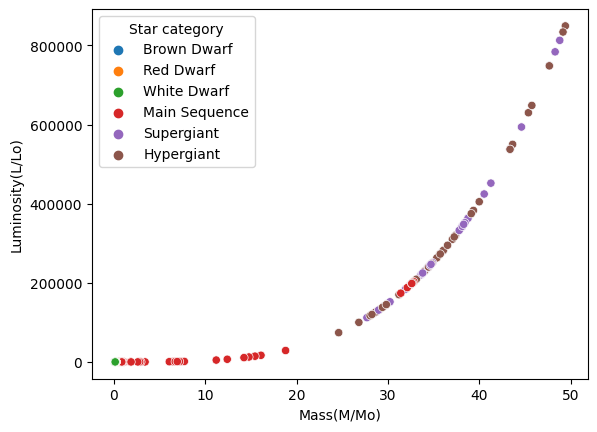

In [11]:
sns.scatterplot(data=df, x=(df['Luminosity(L/Lo)'] ** (1/3.5)), y='Luminosity(L/Lo)', hue='Star category')
plt.xlabel('Mass(M/Mo)')
plt.show()

**The above plot describing the relationship between Mass (derived from Luminosity) and Luminosity tell us the follwing things:**

1. The plot demonstrates that stars with larger masses emit significantly more energy, with hypergiants and supergiants showing the highest values for 
both mass and luminosity.
2. Brown dwarfs, red dwarfs, and white dwarfs are far less luminous and less massive, clustered towards the bottom left. 
3. This exponential increase in luminosity with mass is a characteristic of stellar evolution, where massive stars burn their fuel more rapidly and shine more brightly.

**Data Preprocessing and Feature Engineering**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
 7   Star category           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [13]:
for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n\n\n')

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64 



Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64 



Star category
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64 





In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

In [16]:
df['Mass (M/Mo)']=(df['Luminosity(L/Lo)']**(1/3.5))

In [17]:
from sklearn.feature_selection import mutual_info_classif
t_x=df.drop(columns='Star category')
t_y=df['Star category']
mi=mutual_info_classif(t_x,t_y)
mi_scores_df=pd.DataFrame({'Feature': t_x.columns, 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                  Feature  MI Score
4               Star type  1.802227
2            Radius(R/Ro)  1.729793
3  Absolute magnitude(Mv)  1.576449
1        Luminosity(L/Lo)  1.114026
7             Mass (M/Mo)  1.100962
5              Star color  0.752568
6          Spectral Class  0.745899
0         Temperature (K)  0.637295


In [18]:
df['Magnitude_Temperature_Ratio']=df['Absolute magnitude(Mv)']/df['Temperature (K)']

In [19]:
mi=mutual_info_classif(df[['Magnitude_Temperature_Ratio']],t_y)
mi_scores_df=pd.DataFrame({'Feature':['Magnitude_Temperature_Ratio'], 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                       Feature  MI Score
0  Magnitude_Temperature_Ratio  1.485496


In [20]:
df['Radius_Luminosity_Ratio']=(df['Radius(R/Ro)']/df['Luminosity(L/Lo)'])

In [21]:
mi=mutual_info_classif(df[['Radius_Luminosity_Ratio']],t_y)
mi_scores_df=pd.DataFrame({'Feature':['Radius_Luminosity_Ratio'], 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                   Feature  MI Score
0  Radius_Luminosity_Ratio  1.139594


In [22]:
t_x=df.drop(columns='Star category')
t_y=df['Star category']
mi=mutual_info_classif(t_x,t_y)
mi_scores_df=pd.DataFrame({'Feature': t_x.columns, 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                       Feature  MI Score
4                    Star type  1.802227
2                 Radius(R/Ro)  1.729550
3       Absolute magnitude(Mv)  1.576333
8  Magnitude_Temperature_Ratio  1.485496
9      Radius_Luminosity_Ratio  1.139594
7                  Mass (M/Mo)  1.092486
1             Luminosity(L/Lo)  1.079129
5                   Star color  0.750580
6               Spectral Class  0.721927
0              Temperature (K)  0.633557


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature (K)              240 non-null    int64  
 1   Luminosity(L/Lo)             240 non-null    float64
 2   Radius(R/Ro)                 240 non-null    float64
 3   Absolute magnitude(Mv)       240 non-null    float64
 4   Star type                    240 non-null    int64  
 5   Star color                   240 non-null    int64  
 6   Spectral Class               240 non-null    int64  
 7   Star category                240 non-null    int64  
 8   Mass (M/Mo)                  240 non-null    float64
 9   Magnitude_Temperature_Ratio  240 non-null    float64
 10  Radius_Luminosity_Ratio      240 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 20.8 KB


**Data Preparation**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop(columns='Star category')
y=df['Star category']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [26]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score,recall_score

**AdaBoost Classifier**

In [27]:
ada=AdaBoostClassifier(algorithm='SAMME')
ada_xt=x_t.copy()
ada_xte=x_te.copy()
ada_yt=y_t.copy()
ada_yte=y_te.copy()
param={'estimator': [DecisionTreeClassifier(max_depth=1),None], 
    'learning_rate': np.arange(0.1, 2.01, 0.01),
    'n_estimators': [300]}
nada=RandomizedSearchCV(ada,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='accuracy')
nada.fit(ada_xt,ada_yt)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 300, 'learning_rate': 1.5499999999999994, 'estimator': DecisionTreeClassifier(max_depth=1)}
0.7333333333333334


In [28]:
nada=nada.best_estimator_
pred1_t=nada.predict(ada_xt)
pred1=nada.predict(ada_xte)

**Decision Tree Classifier**

In [29]:
dt_xt=x_t.copy()
dt_xte=x_te.copy()
dt_yt=y_t.copy()
dt_yte=y_te.copy()
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(dt_xt,dt_yt)
alphas=path.ccp_alphas
param={'ccp_alpha':alphas}
ndt = GridSearchCV(dt, param_grid=param, n_jobs=-1, scoring='accuracy')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.0}
0.9944444444444445


In [30]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(1,51)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='accuracy')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 32, 'min_samples_leaf': 21, 'max_features': None, 'criterion': 'gini'}
1.0


In [31]:
pred2_t=ndt.predict(dt_xt)
pred2=ndt.predict(dt_xte)

**Random Forest Classifier**

In [32]:
rf_xt=x_t.copy()
rf_xte=x_te.copy()
rf_yt=y_t.copy()
rf_yte=y_te.copy()
rf=RandomForestClassifier()
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,52)),
       'min_samples_leaf':list(np.arange(1,52)),
       'n_estimators':[400]}
nrf=RandomizedSearchCV(rf,param_distributions=param,n_jobs=-1,random_state=20,cv=10)
nrf.fit(rf_xt,rf_yt)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 400, 'min_samples_split': 36, 'min_samples_leaf': 14, 'criterion': 'entropy'}
1.0


In [33]:
nrf=nrf.best_estimator_
pred3_t=nrf.predict(rf_xt)
pred3=nrf.predict(rf_xte)

In [34]:
tdf=pd.DataFrame({
    'Classification Algorithms': ['AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Training Accuracy': [
        accuracy_score(ada_yt, pred1_t),
        accuracy_score(dt_yt, pred2_t),
        accuracy_score(rf_yt, pred3_t)
    ],
    'Training Precision': [
        precision_score(ada_yt, pred1_t, average='weighted', zero_division=0),
        precision_score(dt_yt, pred2_t, average='weighted', zero_division=0),
        precision_score(rf_yt, pred3_t, average='weighted', zero_division=0)
    ],
    'Training Recall': [
        recall_score(ada_yt, pred1_t, average='weighted'),
        recall_score(dt_yt, pred2_t, average='weighted'),
        recall_score(rf_yt, pred3_t, average='weighted')
    ],
    'Training F1 Score': [
        f1_score(ada_yt, pred1_t, average='weighted'),
        f1_score(dt_yt, pred2_t, average='weighted'),
        f1_score(rf_yt, pred3_t, average='weighted')
    ]
})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,AdaBoost Classifier,0.838889,0.754372,0.838889,0.783453
1,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000


In [35]:
tedf=pd.DataFrame({
    'Classification Algorithms': ['AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Testing Accuracy': [
        accuracy_score(ada_yte, pred1),
        accuracy_score(dt_yte, pred2),
        accuracy_score(rf_yte, pred3)
    ],
    'Testing Precision': [
        precision_score(ada_yte, pred1, average='weighted', zero_division=0),
        precision_score(dt_yte, pred2, average='weighted', zero_division=0),
        precision_score(rf_yte, pred3, average='weighted', zero_division=0)
    ],
    'Testing Recall': [
        recall_score(ada_yte, pred1, average='weighted'),
        recall_score(dt_yte, pred2, average='weighted'),
        recall_score(rf_yte, pred3, average='weighted')
    ],
    'Testing F1 Score': [
        f1_score(ada_yte, pred1, average='weighted'),
        f1_score(dt_yte, pred2, average='weighted'),
        f1_score(rf_yte, pred3, average='weighted')
    ]
})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,AdaBoost Classifier,0.816667,0.739474,0.816667,0.762346
1,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
2,Random Forest Classifier,0.983333,0.985417,0.983333,0.983333


In [36]:
print('AdaBoost Classifier classification report\n\n',classification_report(ada_yte,pred1,zero_division=0),'\n\n\n')
print('Decision Tree Classifier classification report\n\n',classification_report(dt_yte,pred2,zero_division=0),'\n\n\n')
print('Random Forest Classifier classification report\n\n',classification_report(dt_yte,pred3,zero_division=0))

AdaBoost Classifier classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       0.42      1.00      0.59         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       0.00      0.00      0.00        11

    accuracy                           0.82        60
   macro avg       0.74      0.83      0.77        60
weighted avg       0.74      0.82      0.76        60
 



Decision Tree Classifier classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       1.00      1.00  

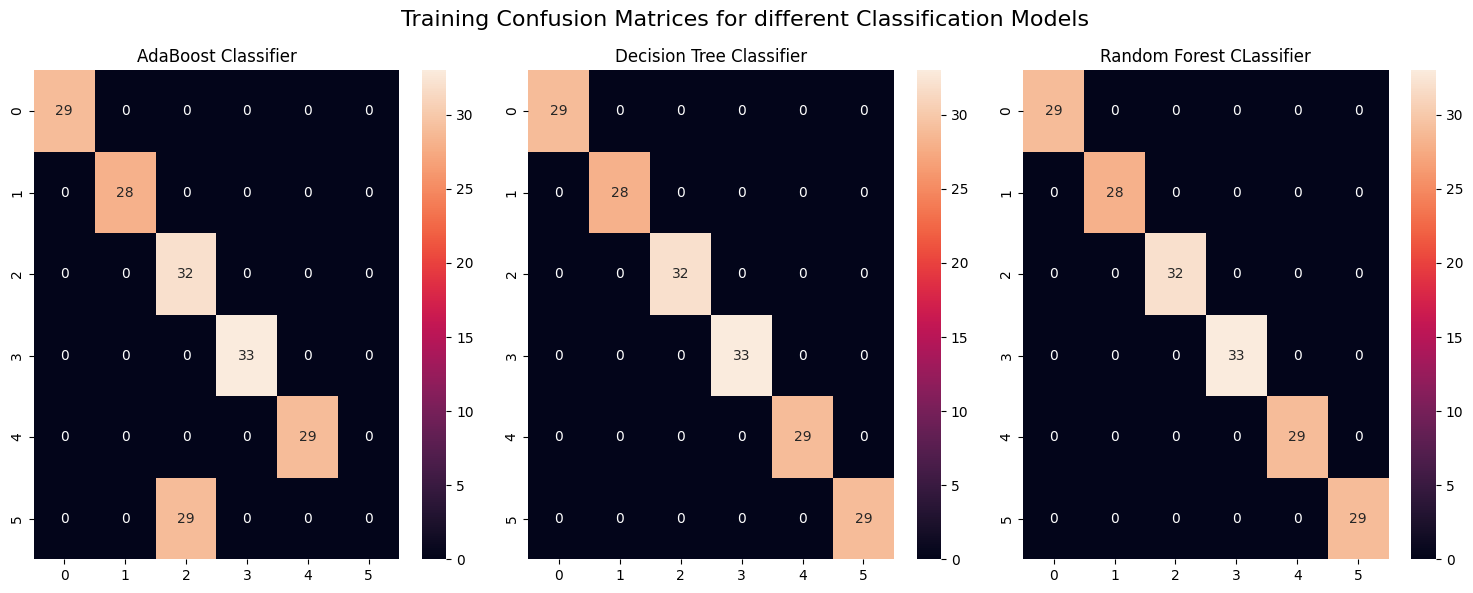

In [37]:
fig,axs=plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Training Confusion Matrices for different Classification Models', fontsize=16)
sns.heatmap(confusion_matrix(ada_yt,pred1_t),annot=True,ax=axs[0])
axs[0].set_title('AdaBoost Classifier')
sns.heatmap(confusion_matrix(dt_yt,pred2_t),annot=True,ax=axs[1])
axs[1].set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(dt_yt,pred3_t),annot=True,ax=axs[2])
axs[2].set_title('Random Forest CLassifier')
plt.tight_layout()
plt.show()

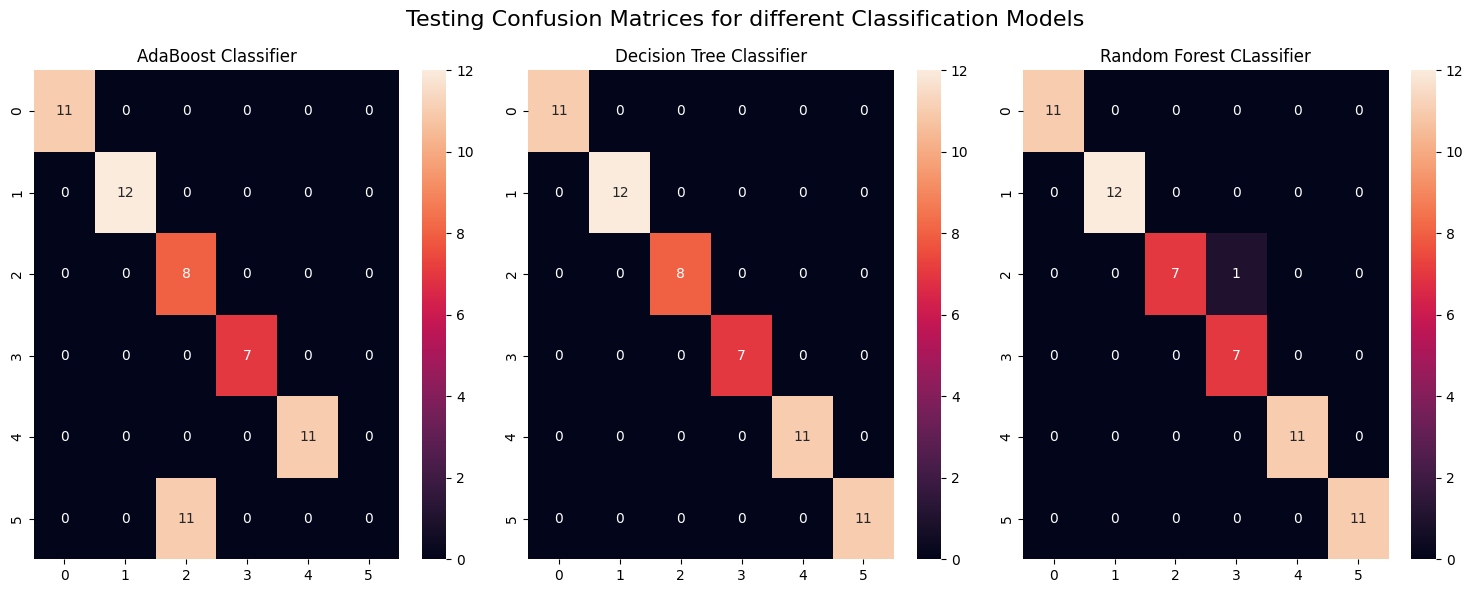

In [38]:
fig,axs=plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Testing Confusion Matrices for different Classification Models', fontsize=16)
sns.heatmap(confusion_matrix(ada_yte,pred1),annot=True,ax=axs[0])
axs[0].set_title('AdaBoost Classifier')
sns.heatmap(confusion_matrix(dt_yte,pred2),annot=True,ax=axs[1])
axs[1].set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(dt_yte,pred3),annot=True,ax=axs[2])
axs[2].set_title('Random Forest CLassifier')
plt.tight_layout()
plt.show()

**AdaBoost Classifier:**

1. Training Performance: It shows decent accuracy (83.89%) and reasonable precision (75.44%), recall (83.89%), and F1 score (78.35%).
2. Testing Performance: The testing accuracy (81.67%) is slightly lower than the training accuracy, indicating potential overfitting, though the metrics remain relatively stable.
****


**Decision Tree Classifier:**

1. Training Performance: It achieved perfect scores across all metrics (accuracy, precision, recall, F1 score) on the training data (100%).
2. Testing Performance: Similarly, it also scored perfectly on the testing data. This suggests that the model may be overfitting the data, as it performs exceptionally well on both training and testing.
****


**Random Forest Classifier:**

1. Training Performance: Like the Decision Tree, it also achieved perfect scores on the training data.
2. Testing Performance: The testing accuracy (98.33%) is very high, with precision (98.54%), recall (98.33%), and F1 score (98.33%) indicating strong generalization capability. This suggests it balances well between fitting the training data and performing well on unseen data.
****


**Overall Conclusions:**

1. The Decision Tree and Random Forest Classifiers exhibit perfect performance on both training and testing sets, indicating they may be overfitting the training data, but the Random Forest shows better generalization compared to the Decision Tree.
2. The AdaBoost Classifier performs adequately but does not reach the high performance of the other two models, suggesting it may be a less optimal choice for this particular dataset.
3. When choosing a model, the Random Forest might be the best option due to its strong testing performance, while the Decision Tree might need further tuning to avoid overfitting.
